In [2]:
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import matplotlib
import aplpy
%matplotlib inline

/home/mmarcano/anaconda3/envs/ngc6652/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  obj_type='module')


# Define the directories

In [3]:
datadir = '/home/mmarcano/Documents/VIMOS/NGC6652/data/NGC6652B4/2003-06-24T04:24:10/RawESOdata/'
cubepath = datadir+'Combine/ifu_science_flux_cube_wcscorrected.fits'
productdir = datadir +'Combine/'

## Open and read the cube

In [4]:
file = fits.open(cubepath)
cube = SpectralCube.read(file[0])

In [5]:
print(cube)

SpectralCube with shape=(4259, 40, 40):
 n_x:     40  type_x: RA---TAN  unit_x: deg    range:   278.934116 deg:  278.938379 deg
 n_y:     40  type_y: DEC--TAN  unit_y: deg    range:   -32.996693 deg:  -32.993118 deg
 n_s:   4259  type_s: WAVE      unit_s: Angstrom  range:     4000.000 Angstrom:    8258.000 Angstrom


/home/mmarcano/anaconda3/envs/ngc6652/lib/python3.6/site-packages/spectral_cube/base_class.py:99: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = [i[view] for i in inds[::-1]]  # numpy -> wcs order


### Extract $\pm 3$ to $H\beta$ 4861 A

In [6]:
linebeta = 4861.

mom0line = cube.spectral_slab((linebeta-5.)*u.AA, (linebeta+5.)*u.AA).sum(axis=0)
mom0line.write(productdir+'betaline.fits', overwrite=True)

/home/mmarcano/anaconda3/envs/ngc6652/lib/python3.6/site-packages/spectral_cube/utils.py:39: UserWarning: This function (<function BaseSpectralCube.sum at 0x7f357c790d90>) requires loading the entire cube into memory and may therefore be slow.
  "memory and may therefore be slow.".format(str(function)))


The only way I figures to easily display the resulting image is to safe it as a fits file and imported and plot it using aply. There are probably better ways but ..

INFO: Auto-setting vmin to -1.123e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.247e+01 [aplpy.core]


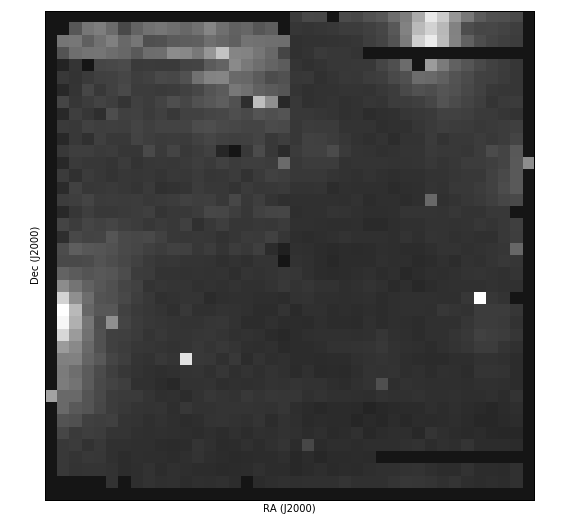

In [8]:
hebtaimage = aplpy.FITSFigure(productdir+'betaline.fits')
hebtaimage.show_grayscale()


## Extract "Continium"


In [9]:
contilines = 4550
mom0cont = cube.spectral_slab((contilines-5.)*u.AA, (contilines+5.)*u.AA).sum(axis=0)
mom0cont.hdu.writeto(productdir+'contslab.fits', overwrite=True)


/home/mmarcano/anaconda3/envs/ngc6652/lib/python3.6/site-packages/spectral_cube/utils.py:39: UserWarning: This function (<function BaseSpectralCube.sum at 0x7f357c790d90>) requires loading the entire cube into memory and may therefore be slow.
  "memory and may therefore be slow.".format(str(function)))


INFO: Auto-setting vmin to -8.964e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.950e+00 [aplpy.core]


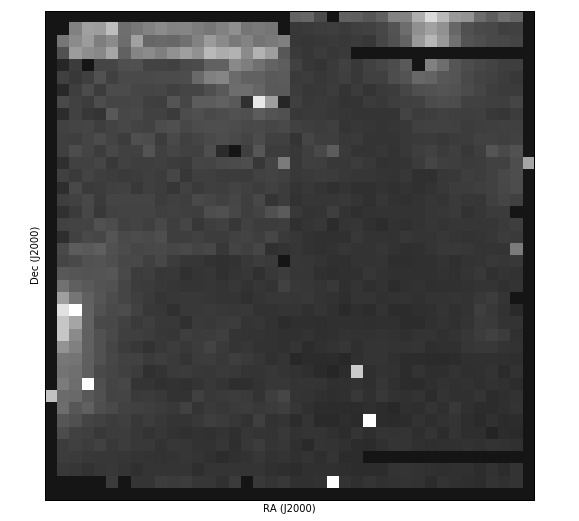

In [10]:
figcont = aplpy.FITSFigure(productdir+'contslab.fits')
figcont.show_grayscale()


# The difference

INFO: Auto-setting vmin to -5.173e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.519e+00 [aplpy.core]


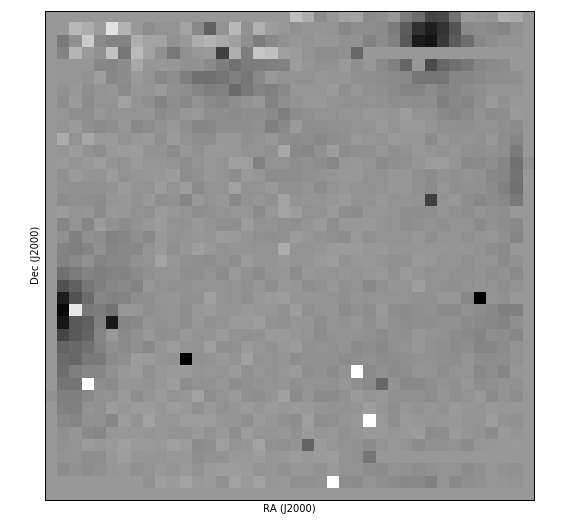

In [16]:
resta = mom0cont - mom0line
resta.hdu.writeto(productdir+'resta.fits', overwrite=True)
figresta = aplpy.FITSFigure(productdir+'resta.fits')
figresta.show_grayscale(stretch='arcsinh', vmin=-2, vmax=10,invert=True)
figresta.show_grayscale()
#figresta.add_colorbar()

In [12]:
print('Max: {}'.format(resta.max()))
restanp = np.array(resta)

Max: 12.460122108459473


In [13]:
listawhere = np.where(restanp > 0)
yx = list(zip(listawhere[0],listawhere[1]))
print("Above zero: {}".format(len(yx)))

Above zero: 263


This gives me the row and column of the column minus one since Python counts from 0. First one is y and second is x in the ds9 image

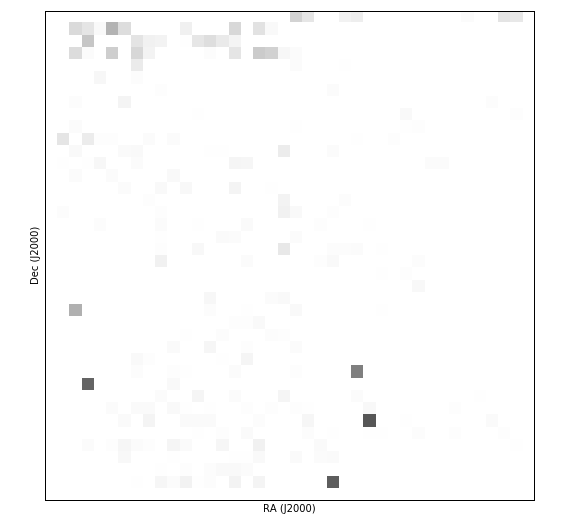

In [14]:
resta = mom0cont - mom0line
resta.hdu.writeto(productdir+'resta.fits', overwrite=True)
figresta = aplpy.FITSFigure(productdir+'resta.fits')
figresta.show_grayscale(stretch='arcsinh', vmin=0, vmax=50,invert=True)